### **Data Cleansing untuk Model Machine Learning**

oleh Sermon Paskah Zagoto

**Import Library dan Dataset**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 50
df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# menampilkan jumlah baris dan kolom
df_load.shape

(7113, 22)

In [3]:
# menampilkan 5 baris data teratas
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# nilai customerID yang bersifat unique
df_load.customerID.nunique()

7017

**Memfilter ID Number Pelanggan Format Tertentu**

Mencari format ID Number (Phone Number) Pelanggan customerID yang benar, dengan kriteria:

1. Panjang karakter adalah 11-12.
2. Terdiri dari Angka Saja, tidak diperbolehkan ada karakter selain angka
3. Diawali dengan angka 45 2 digit pertama.

In [5]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'45\d{9,10}')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('Hasil jumlah ID Customer yang terfilter adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang terfilter adalah 7006


**Memfilter Duplikasi ID Number Pelanggan**

Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

1. Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya.
2. Duplikasi dikarenakan inserting beda periode pengambilan data

In [6]:
df_load.drop_duplicates()

df_load = df_load.sort_values('UpdatedAt', ascending = True).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya adalah 6993


**Kesimpulan**

Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersbut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 coloumns dengan 7017 jumlah ID yang Unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data.

**Mengatasi Missing Values dengan Penghapusan Rows**

Selanjutnya kita akan menghapus Rows dari data-data yang tidak terdeteksi apakah dia churn atau tidak. Di asumsikan data modeller hanya mau menerima data yang benar ada flag churn nya atau tidak.

In [7]:
print("Total missing values data dari kolom Churn", df_load['Churn'].isnull().sum())
df_load.dropna(subset=['Churn'], inplace=True)
print("Total Rows dan kolom Data setelah dihapus data Missing Values adalah", df_load.shape)

Total missing values data dari kolom Churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


**Mengatasi Missing Values dengan Pengisian Nilai tertentu**

Selain dengan mengapus rows dari data, menangani missing values bisa menggunakan nilai tertentu. Diasumsikan data modeller meminta pengisian missing values dengan kriteria berikut:

1. Tenure pihak data modeller meminta setiap rows yang memiliki missing values untuk Lama berlangganan di isi dengan 11
2. Variable yang bersifat numeric selain Tenure di isi dengan median dari masing-masing variable tersebut

Tentukan :

1. Apakah masih ada data yang missing values
2. Jumlah Missing Values dari masing-masing variable
3. Tangani Missing Valuesnya

In [8]:
print("Status missing values :", df_load.isnull().values.any())

print("Jumlah missing value masing-masing kolom, adalah :")

df_load.isnull().sum().sort_values(ascending=False)

Status missing values : True
Jumlah missing value masing-masing kolom, adalah :


tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64

In [9]:
# handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# handling missing values numvars (expect Tenure)
median_monthly = df_load['MonthlyCharges'].median()
df_load['MonthlyCharges'] = df_load['MonthlyCharges'].fillna(median_monthly)

median_total = df_load['TotalCharges'].median()
df_load['TotalCharges'] = df_load['TotalCharges'].fillna(median_total)

In [10]:
df_load.isnull().sum().sort_values(ascending=False)

Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64

**Kesimpulan**

Setelah kita analisis lebih lanjut, ternyata masih ada Missing Values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (Outlier

**Mendeteksi adanya Outlier (Boxplot)**

Mendeteksi Pencilan dari suatu Nilai (Outlier) salah satunya bisa melihat plot dari data tersebut menggunakan Box Plot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan.

 

In [11]:
print("Distribution of data before handled by Outlier")
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

Distribution of data before handled by Outlier
            tenure  MonthlyCharges  TotalCharges
count  6950.000000      6950.00000   6950.000000
mean     32.477266        65.79741   2305.135403
std      25.188910        50.47553   2578.739530
min       0.000000         0.00000     19.000000
25%       9.000000        36.46250    406.975000
50%      29.000000        70.45000   1400.850000
75%      55.000000        89.85000   3799.837500
max     500.000000      2311.00000  80000.000000


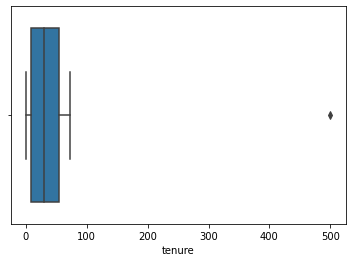

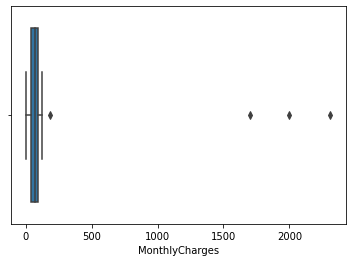

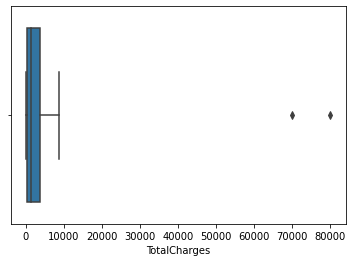

In [12]:
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

**Mengatasi Outlier**

Setelah kita mengetahui variable mana saja yang terdapat pencilan (Outlier), selanjutnya kita akan atasi Outlier dengan menggunakan metode interquartile range (IQR)

Maximum values for each columns is:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64
Minimum values for each columns is:
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64
Distribution of data after handled by Outlier
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       65.004414   2286.110692
std      24.581073       30.056732   2265.803585
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


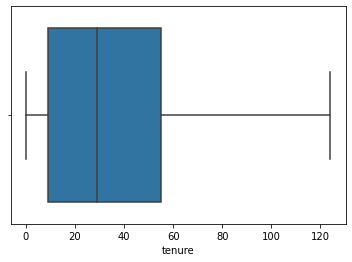

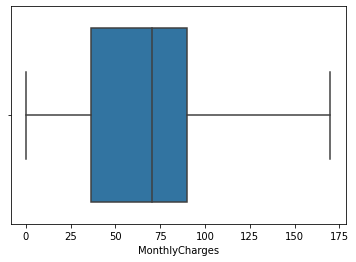

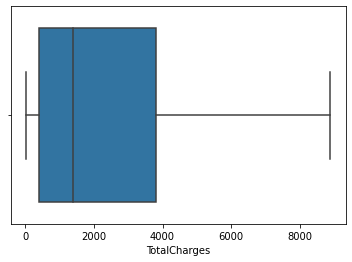

In [14]:
Q1 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure', 'MonthlyCharges', 'TotalCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5 * IQR)
print("Maximum values for each columns is:")
print(maximum)
minimum = Q1 - (1.5 * IQR)
print("Minimum values for each columns is:")
print(minimum)

df_load['tenure'].mask(df_load['tenure'] > maximum['tenure'], maximum['tenure'], inplace=True)
df_load['MonthlyCharges'].mask(df_load['MonthlyCharges'] > maximum['MonthlyCharges'], maximum['MonthlyCharges'], inplace=True)
df_load['TotalCharges'].mask(df_load['TotalCharges'] > maximum['TotalCharges'], maximum['TotalCharges'], inplace=True)

print("Distribution of data after handled by Outlier")
print(df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

**Kesimpulan**

Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik titik yang berada jauh dari gambar boxplotnya. Kemudian kalo kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai Maximum & Minimum dari interquartile range (IQR). Setelah di tangani outliernya, dan dilihat perseberan data nya, terlihat sudah tidak ada lagi nilai yang outlier.



**Mendeteksi Nilai yang tidak Standar**

Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standarisasi dari data yang sudah terinput.

In [17]:
for col_name in list(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                      'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']):
  print("\nUnique Values Count \033[1m" + "Before Standar \033[0mVariable", col_name)
  print(df_load[col_name].value_counts())


Unique Values Count Before Standar Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standar Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standar Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standar Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standar Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standar Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standar Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Before Standar Variable OnlineSecurity
No      

**Menstandarisasi Variable Kategorik**

Setelah kita mengeteahui variable mana saja yang ada nilai tidak standar, maka kita standarkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah.

In [18]:
df_load = df_load.replace(['Wanita', 'Laki-Laki', 'Churn', 'Iya'], ['Female', 'Male', 'Yes', 'Yes'])

for col_name in list(['gender', 'Dependents', 'Churn']):
  print("\nUnique Values Count \033[1m" + "After Standar \033[0mVariable", col_name)
  print(df_load[col_name].value_counts())


Unique Values Count After Standar Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standar Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standar Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


**Kesimpulan**

Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah :

1. Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standarkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
2. Dependents (Yes, No, Iya), yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
3. Churn (Yes, No, Churn), yang bisa di standarkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.

Setelah kita standarkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value nya.